# <font color=red>Tutorial 8 - Hypotheses testing - Bootstrap</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Sri Lanka population height sample

We would like to estimate the mean height of Sri Lanka's population based on a sample provided in the attached CSV file, which we assume, represents the entire Sri Lanka's population. We will use the bootstrap method to estimate the mean height with confidence of 95%.

### Read CSV file

In [22]:
sri_lanka_sample_df = pd.read_csv('Tutorial_8_data.csv')
sri_lanka_sample_df

,Height(cm),Gender,Age
0,173,Male,26
1,164,Male,56
2,163,Male,26
3,171,Male,64
4,160,Male,78
...,...,...,...
4472,146,Female,42
4473,149,Female,38
4474,139,Female,46
4475,141,Female,45


In [3]:
sri_lanka_sample_df.shape

(4477, 3)

### Use bootstrap to estimate Sri Lanka's population height mean

In [10]:
def bootstrap_mean(original_sample, column_name, num_replications):
    '''This function returns an array of bootstrapped sample means:
    original_sample: df containing the original sample
    column_name: name of column containing the variable of interest
    num_replications: number of bootstrap samples  '''  
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_var_of_interest = original_sample[[column_name]]
    bstrap_means = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample_var_of_interest.sample(original_sample_size, replace=True) # note WITH REPLACEMENT!
        resampled_mean = bootstrap_sample.mean()
        bstrap_means[i] = resampled_mean
    
    return bstrap_means

In [14]:
# run the bootstrap procedure
means_bootstrapped = bootstrap_mean(sri_lanka_sample_df, 'Height(cm)', 5000)

Text(0.5, 0.98, 'Bootstrap means distribution (5000 simulations)')

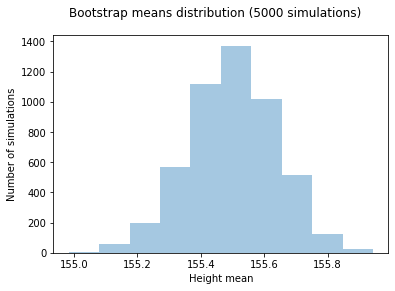

In [15]:
# visualize results
fig, axes = plt.subplots()
sns_ax = sns.distplot(means_bootstrapped, kde=False, bins=10, ax=axes);
sns_ax.set(xlabel='Height mean', ylabel='Number of simulations');
fig.suptitle('Bootstrap means distribution (5000 simulations)')

In [16]:
sri_lanka_sample_df['Height(cm)'].mean()

155.50011168192987

In [17]:
means_bootstrapped.min()

154.982800982801

In [18]:
means_bootstrapped.max()

155.9432655796292

In [19]:
# 95% confidence interval for the gross income of movies based on our sample
left_end = np.percentile(means_bootstrapped, 2.5, interpolation='higher')
right_end =  np.percentile(means_bootstrapped, 97.5, interpolation='higher')
print('lower value: ', left_end)
print('upper value: ', right_end)

lower value:  155.2218003127094
upper value:  155.76502121956668


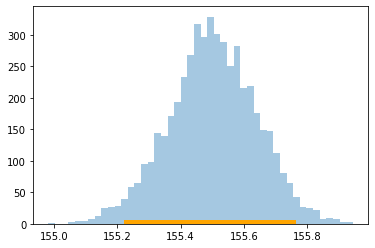

In [20]:
# visualize results
ax = sns.distplot(means_bootstrapped, kde=False);
plt.hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=8)  # show line of values between 2.5 and 97.5 percentiles

## <font color=blue> **Exercise** </font>

Since Sri Lanka's males are relatively short, a student assumed that there is no difference between the mean height of males and females in Sri Lanka. Examine the student's claim.

1. Clearly state the two hypotheses

H0 - There is no difference between the mean height of males and females in Sri Lanka.
H1 -  There is a difference between the mean height of males and females in Sri Lanka (one of them is higher).

2. What is your test statistic? 

3. Use the bootstrap method to examine the student's claim

In [29]:
def bootstrap_mean_from_series(heights_series, num_replications):
    '''This function returns an array of bootstrapped sample means:
    original_sample: df containing the original sample
    column_name: name of column containing the variable of interest
    num_replications: number of bootstrap samples  '''  
    series_size = len(heights_series) # we need to replicate with the same sample size
    bstrap_means = np.empty(num_replications)
    for i in np.arange(num_replications):
        bootstrap_sample = heights_series.sample(series_size, replace=True) # note WITH REPLACEMENT!
        resampled_mean = bootstrap_sample.mean()
        bstrap_means[i] = resampled_mean
    
    return bstrap_means

In [31]:
male_heights = sri_lanka_sample_df[sri_lanka_sample_df['Gender'] == 'Male']['Height(cm)']
female_heights = sri_lanka_sample_df[sri_lanka_sample_df['Gender'] == 'Female']['Height(cm)']

num_replications = 1000

males_bootstrap_heights = bootstrap_mean_from_series(male_heights, num_replications)
females_bootstrap_heights = bootstrap_mean_from_series(female_heights, num_replications)

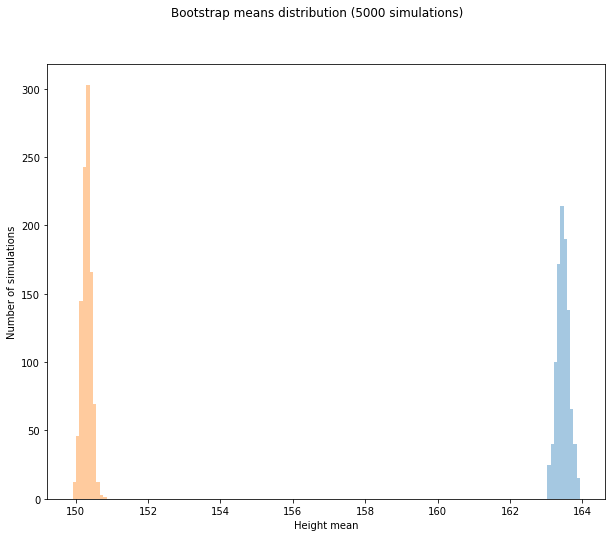

In [34]:
# visualize results
fig, axes = plt.subplots()

sns_ax_1 = sns.distplot(males_bootstrap_heights, kde=False, bins=10, ax=axes);
sns_ax_1.set(xlabel='Height mean', ylabel='Number of simulations');

sns_ax_2 = sns.distplot(females_bootstrap_heights, kde=False, bins=10, ax=axes);
# sns_ax_1.set(xlabel='Height mean', ylabel='Number of simulations');

fig.suptitle(f'Bootstrap means distribution ({num_replications} simulations)')

fig.set_size_inches(10,8)

In [33]:
print(males_bootstrap_heights.mean())
print(females_bootstrap_heights.mean())

163.4656193438914
150.30199778516055
